In [1]:
import NNMFit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar


In [3]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [4]:
scan_dir_dict = {
                 ## reproduce
                 "SPL" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_SPL",
                 "BPL" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_BPL",
                 "LogP" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_LogP",
                 "TwoComps" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_TwoComponent_fitbound",

                 "SPL_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_SPL_2D",


                ### add high energy event
                "SPL_he" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_SPL",
                "BPL_he" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_BPL",
                "TwoComps_he" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_TwoComponent_fitbound",

                "SPL_he_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_SPL_2D",

                ##
                "SPL_emptyICC" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_emptyICC_SPL",
                "BPL_emptyICC" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_emptyICC_BPL",
                "TwoComps_emptyICC" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_emptyICC_TwoComponent",
                
                "SPL_he_emptyICC" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_emptyICC_SPL",
                "BPL_he_emptyICC" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_emptyICC_BPL",
                "TwoComps_he_emptyICC" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_emptyICC_TwoComponent",

                 }

In [5]:
drop_unsuccessful = True

scan_dict = {}

bestfits = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

    bestfits[name] = scan_dict[name].get_freefit(drop_unsuccessful="True")



SPL


BPL
LogP
TwoComps
SPL_2D
SPL_he
BPL_he
TwoComps_he
SPL_he_2D
SPL_emptyICC
BPL_emptyICC
TwoComps_emptyICC
SPL_he_emptyICC
BPL_he_emptyICC
TwoComps_he_emptyICC


In [6]:
# print(scan_dict["TwoComps"].get_raw_df().loc["freefit"].keys())
scan_dict["BPL"].get_raw_df().loc["freefit"][["astro_norm","e_break","gamma_1","gamma_2","llh","fit_success"]]
# scan_dict["TwoComps"].get_raw_df().loc["freefit"][["astro_norm","gamma_soft","delta_2comp","mixture","llh","fit_success"]]

,astro_norm,e_break,gamma_1,gamma_2,llh,fit_success
0,1.764369,4.390594,1.312465,2.737485,3583.15962,1
1,1.767114,4.38986,1.314304,2.73522,3583.159443,1
2,1.764368,4.390594,1.312469,2.737486,3583.15962,1
3,1.767114,4.38986,1.314306,2.73522,3583.159443,1
4,1.764377,4.390606,1.312539,2.7375,3583.159629,1
5,1.764353,4.390594,1.312451,2.737488,3583.15962,1
6,1.764366,4.390594,1.312466,2.737487,3583.15962,1
7,1.767082,4.389815,1.314092,2.735203,3583.159443,1
8,1.767117,4.389856,1.314284,2.735217,3583.159443,1
9,1.767081,4.389816,1.31407,2.735206,3583.159443,1


In [7]:

root_1_sigma = 1.0

def find_errors( name ):

    print(5*"-", name)

    parameters = scan_dict[name].get_scan_list()

    for parameter in parameters:

        if parameter == "freefit": continue

        print(parameter)

        # best fit
        print("bestfit", bestfits[name][parameter])

        scan = scan_dict[name].get_scan_df( param_name = parameter, drop_unsuccessful = drop_unsuccessful)

        interpolator_dllh = interp1d(scan[parameter], scan["dllh"], kind='linear', fill_value="extrapolate")

        # Define a function to find the points where dllh = 0.5
        def find_root(value):
            return lambda x: interpolator_dllh(x) - value

        # Solve for points where dllh = 0.5
        roots = []
        for initial_guess in np.linspace(scan[parameter].min(), scan[parameter].max(), 100):
            # print(initial_guess, interpolator_dllh(initial_guess))
            try:
                sol = root_scalar(find_root(root_1_sigma), bracket=[initial_guess, initial_guess + 0.1], method='bisect')
                if sol.converged:
                    roots.append(sol.root)
            except ValueError:
                continue  # Skip intervals where there are no solutions

        # print(roots)

        # Remove duplicate roots that are very close to each other
        threshold = 1e-2  # Define a distance threshold
        unique_roots = []
        for root in roots:
            if not unique_roots or all(abs(root - ur) > threshold for ur in unique_roots):
                unique_roots.append(root)
            
        print(unique_roots)

        print(f"abs diff {abs(unique_roots-bestfits[name][parameter])}")


for name in scan_dir_dict:
    if "2D" in name: continue
    find_errors(name)


----- SPL
astro_norm
bestfit 1.7995627337768922
[1.6375904915070738, 1.9296701509743197]
abs diff [0.16197224 0.13010742]
gamma_astro
bestfit 2.520142518724888
[2.493439334238667, 2.5434601200818157]
abs diff [0.02670318 0.0233176 ]
----- BPL
astro_norm
bestfit 1.7671139653991028
[1.5883164751778371, 1.9501303211270955]
abs diff [0.17879749 0.18301636]
e_break
bestfit 4.389860143269723
[4.294898439792877, 4.4884385160147415]
abs diff [0.0949617  0.09857837]
gamma_1
bestfit 1.3143059182480068
[0.06384443742368605, 1.7860466323581892]
abs diff [1.25046148 0.47174071]
gamma_2
bestfit 2.7352199661287844
[2.6615385799334335, 2.798935327583303]
abs diff [0.07368139 0.06371536]
----- LogP
astro_norm
bestfit 2.134124386545733
[1.9431654565677905, 2.318622386605656]
abs diff [0.19095893 0.184498  ]
astro_parabola_a
bestfit 2.572043821460516
[2.521136441661766, 2.634266437477014]
abs diff [0.05090738 0.06222262]
astro_parabola_b
bestfit 0.22802040417331093
[0.16396806725626287, 0.3221044280094]


In [20]:
def plot_dllh( name, parameter ):

    scan = scan_dict[name].get_scan_df( param_name = parameter, drop_unsuccessful = drop_unsuccessful)

    bestfit = bestfits[name][parameter]

    fig, (ax) = plt.subplots(1, 1)

    ax.plot( scan[parameter], scan["dllh"] )
    ax.axhline(1.0, color="red", linestyle="--", label="dllh = 1.0")
    ax.axvline(bestfit, color="green", linestyle="--", label=f"Bestfit {bestfit:.2f}")

    ax.set_xlabel(parameter)
    ax.set_ylabel("dllh")

    ax.set_title(name)

    # ax.set_ylim( [ min(scan["dllh"]) - 1, min(scan["dllh"]) +5])
    ax.set_ylim( [ -1,5 ])

    ax.legend()

    plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/reproduce_globalfit/dllh_name-{name}_parameter-{parameter}.pdf")



/tmp/ipykernel_24955/3398779907.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax) = plt.subplots(1, 1)


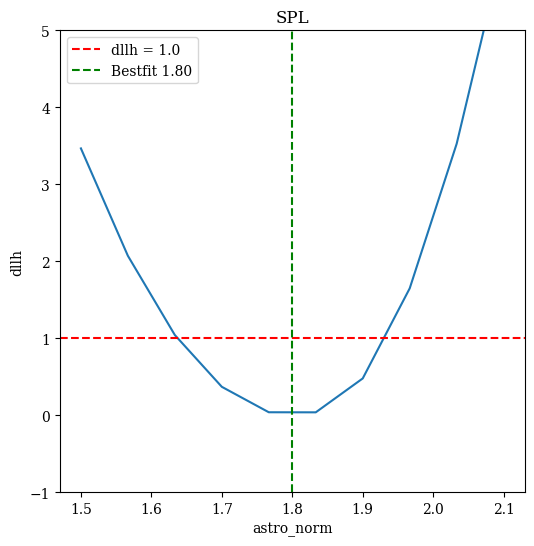

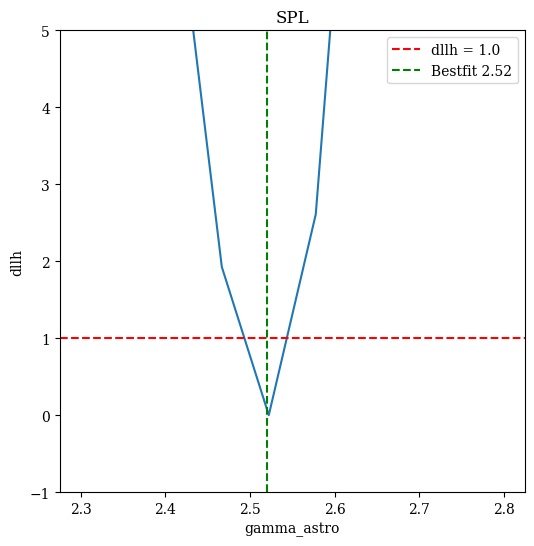

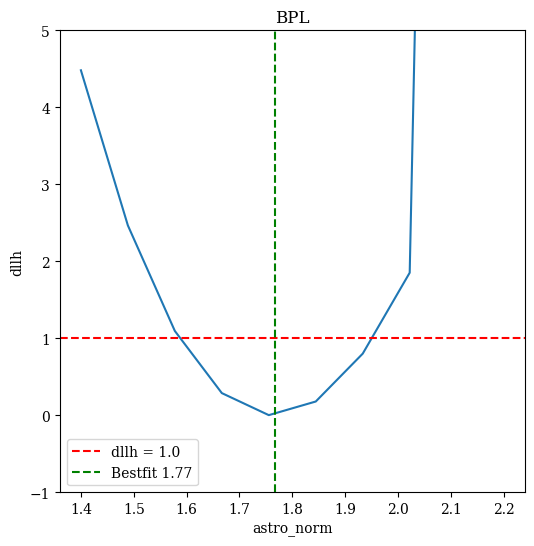

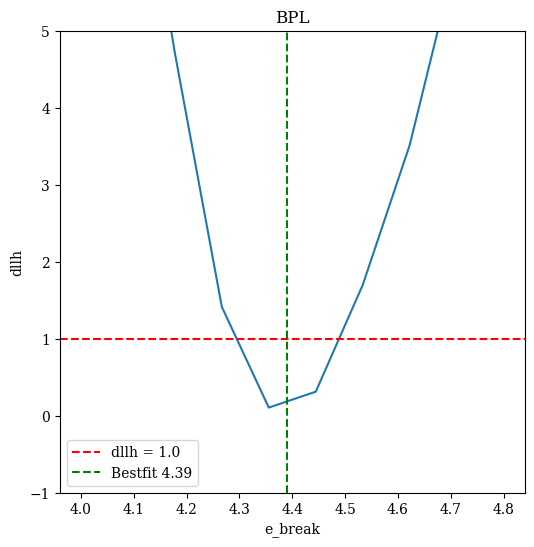

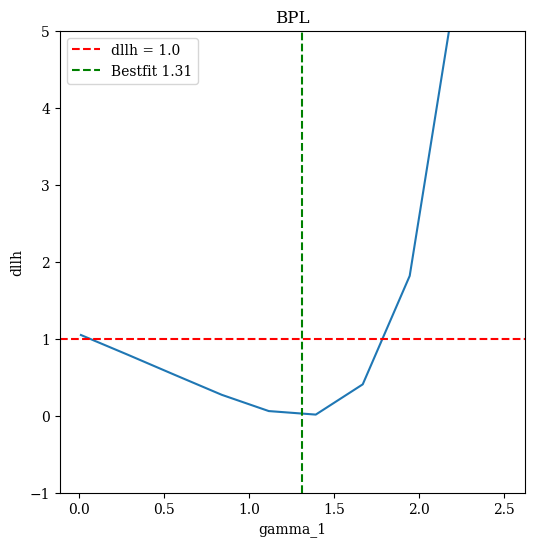

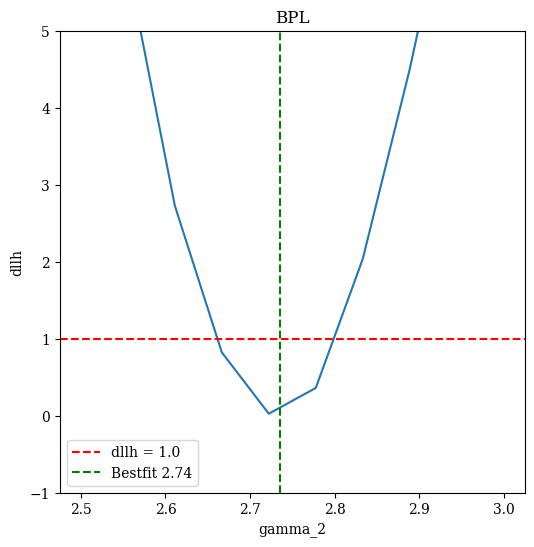

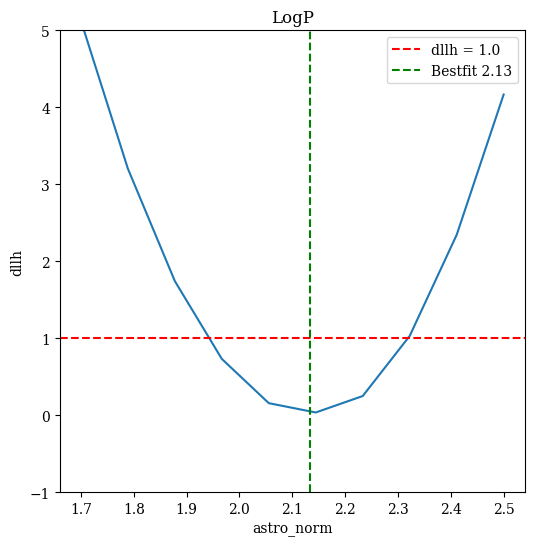

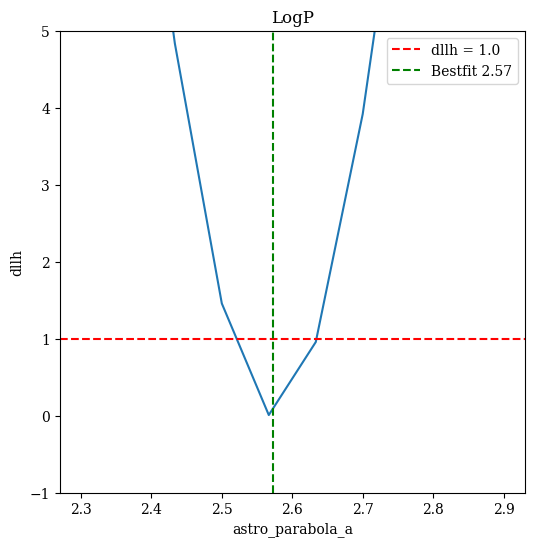

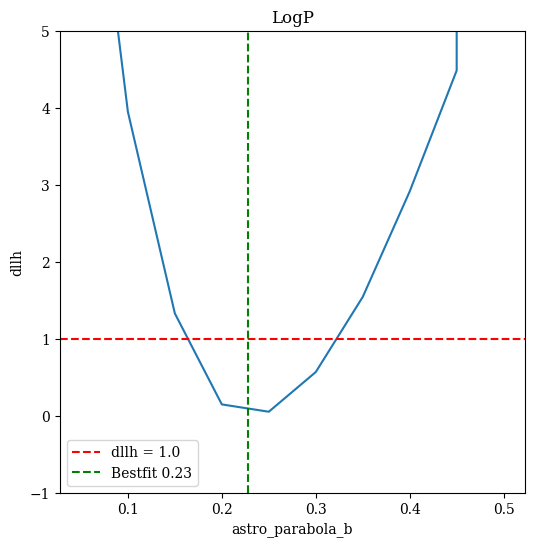

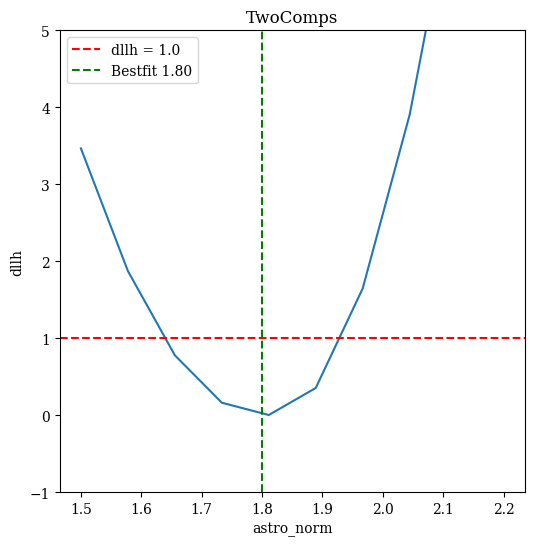

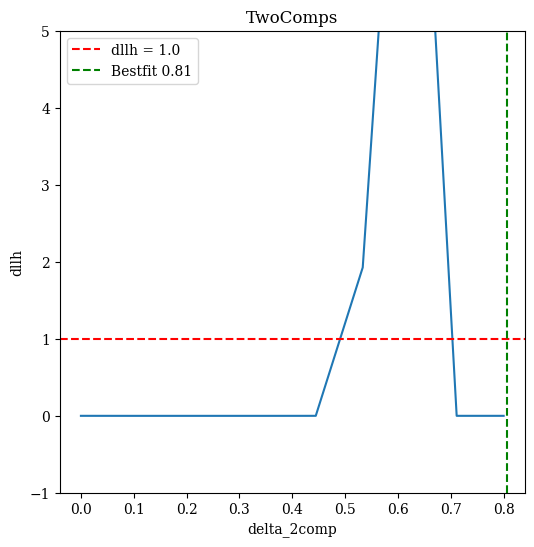

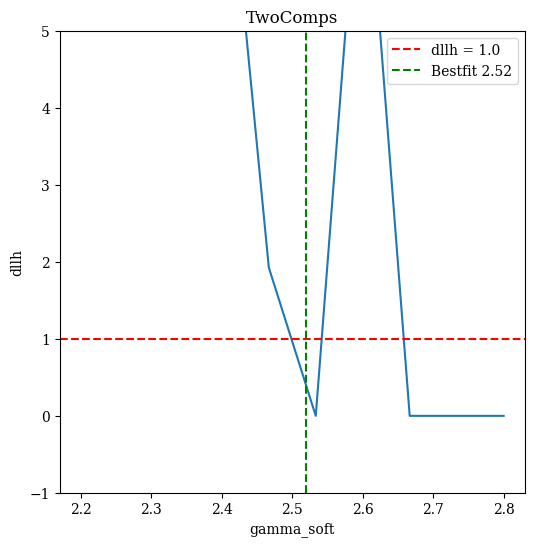

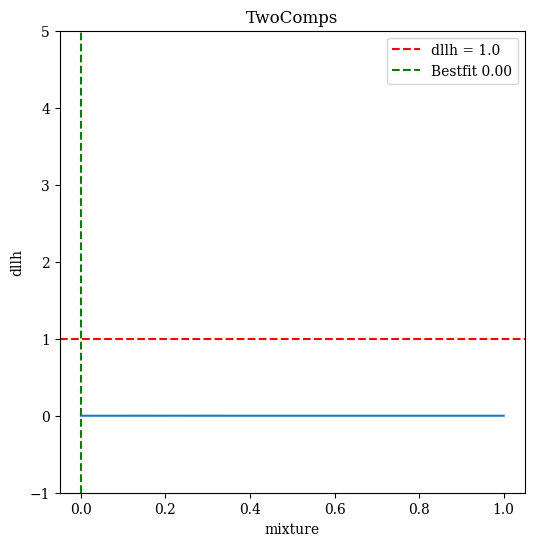

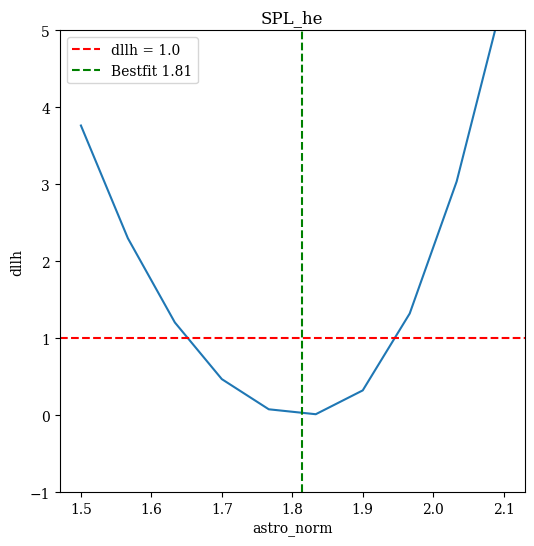

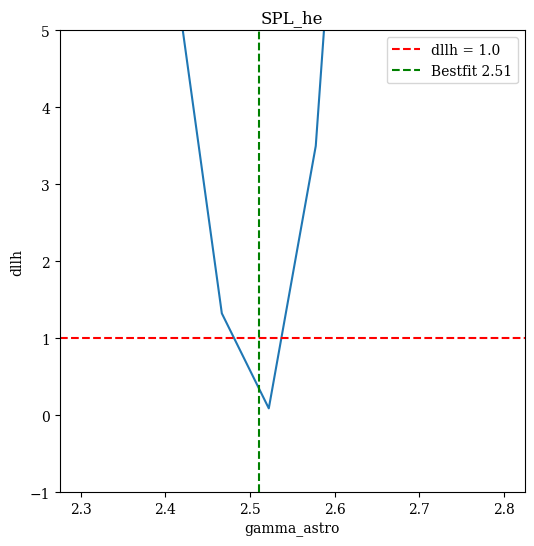

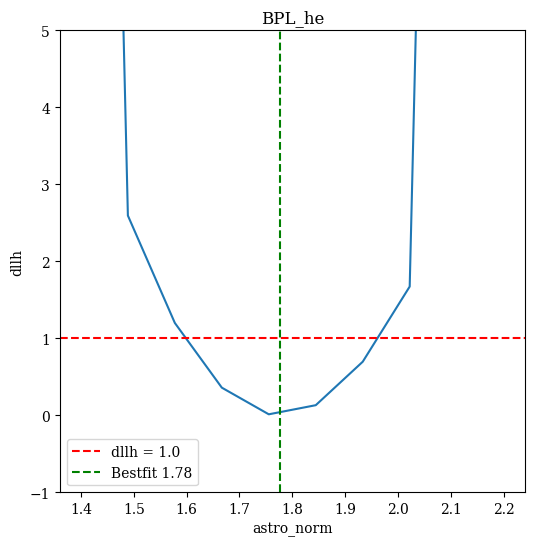

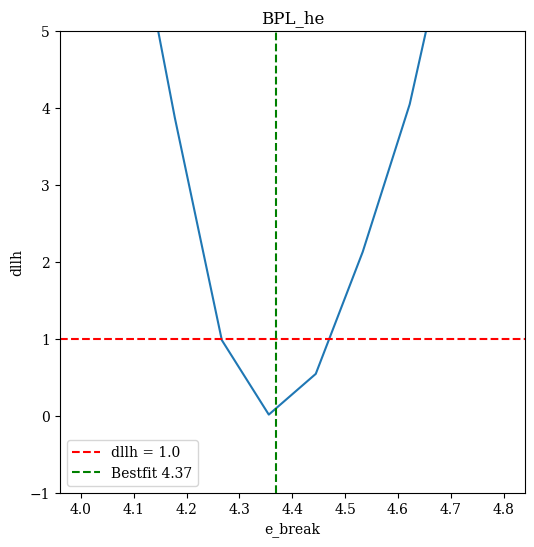

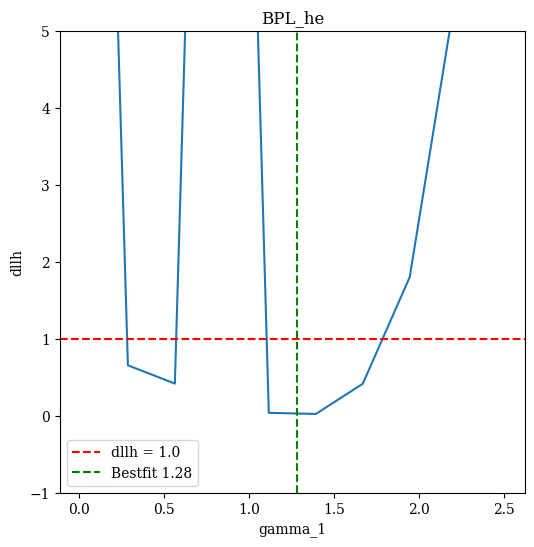

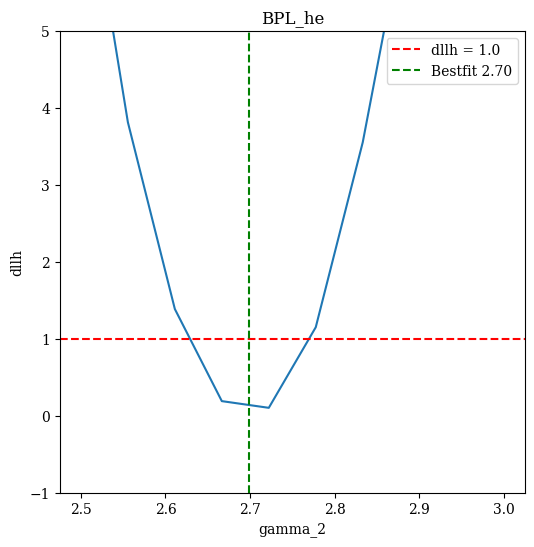

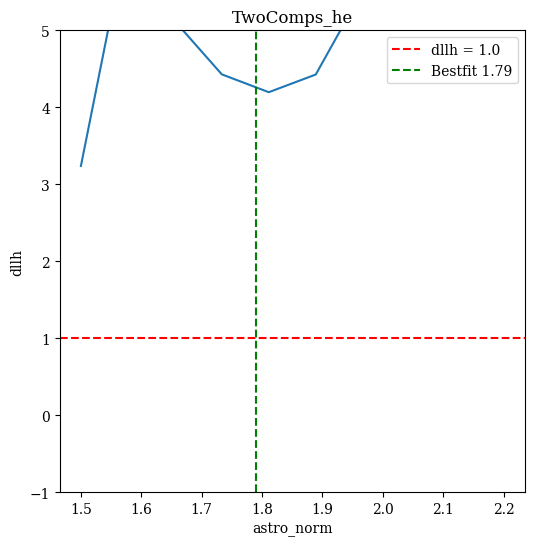

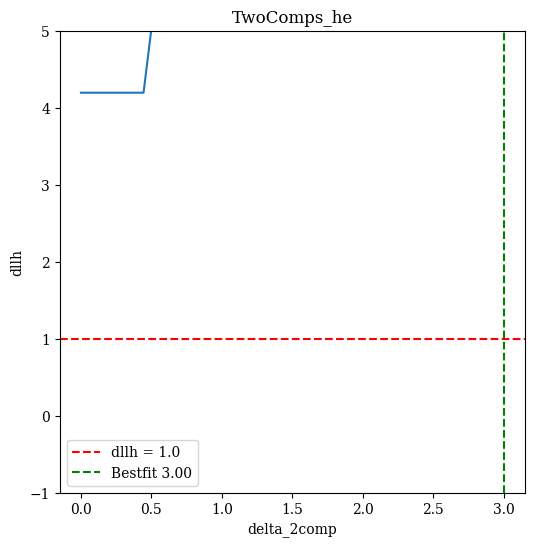

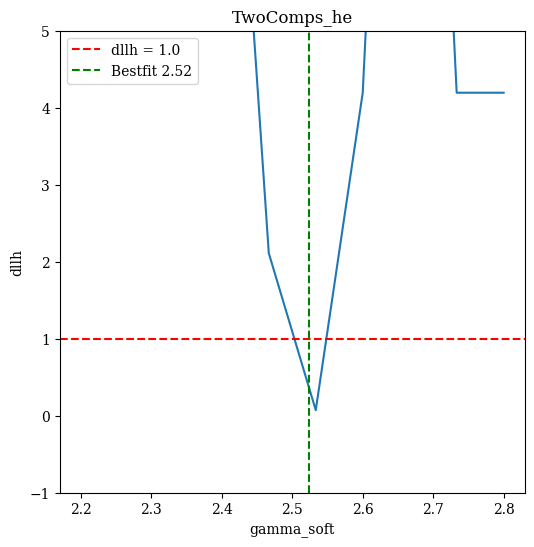

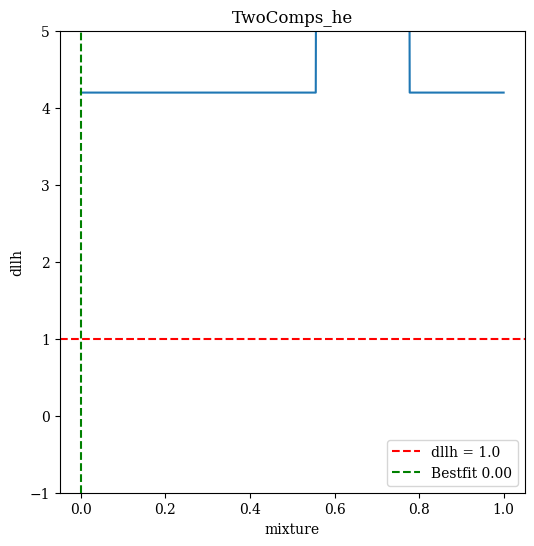

In [21]:
for name in scan_dir_dict:
    if "2D" in name: continue
    parameters = scan_dict[name].get_scan_list()
    for parameter in parameters:
        if parameter == "freefit": continue
        plot_dllh( name, parameter )


In [16]:
import scipy.stats as stats

degrees_of_freedom = 2

def calculate_sigma(chi2_value):

    # Calculate the p-value from the chi-squared survival function
    p_value = stats.chi2.sf(chi2_value, degrees_of_freedom)

    # Convert p-value to sigma (number of standard deviations)
    sigma_significance = stats.norm.isf(p_value)

    return sigma_significance

In [20]:
# compare chi2
print("BPL/SPL",-2*(bestfits["BPL"].llh-bestfits["SPL"].llh), calculate_sigma( -2*(bestfits["BPL"].llh-bestfits["SPL"].llh) ) )
print("LogP/SPL",-2*(bestfits["LogP"].llh-bestfits["SPL"].llh), calculate_sigma( -2*(bestfits["LogP"].llh-bestfits["SPL"].llh) ))
print("TwoC/SPL",-2*(bestfits["TwoComps"].llh-bestfits["SPL"].llh), calculate_sigma( -2*(bestfits["TwoComps"].llh-bestfits["SPL"].llh) ))

# with He
print("he")
print("BPL/SPL",-2*(bestfits["BPL_he"].llh-bestfits["SPL_he"].llh), calculate_sigma( -2*(bestfits["BPL_he"].llh-bestfits["SPL_he"].llh) ))
print("TwoC/SPL",-2*(bestfits["TwoComps_he"].llh-bestfits["SPL_he"].llh), calculate_sigma( -2*(bestfits["TwoComps_he"].llh-bestfits["SPL_he"].llh) ))

# emptyICC
print("emptyICC")
print("BPL/SPL",-2*(bestfits["BPL_emptyICC"].llh-bestfits["SPL_emptyICC"].llh), calculate_sigma( -2*(bestfits["BPL_emptyICC"].llh-bestfits["SPL_emptyICC"].llh) ))
print("TwoC/SPL",-2*(bestfits["TwoComps_emptyICC"].llh-bestfits["SPL_emptyICC"].llh), calculate_sigma( -2*(bestfits["TwoComps_emptyICC"].llh-bestfits["SPL_emptyICC"].llh) ))

# he emptyICC
print("he emptyICC")
print("BPL/SPL",-2*(bestfits["BPL_he_emptyICC"].llh-bestfits["SPL_he_emptyICC"].llh), calculate_sigma( -2*(bestfits["BPL_he_emptyICC"].llh-bestfits["SPL_he_emptyICC"].llh) ))
print("TwoC/SPL",-2*(bestfits["TwoComps_he_emptyICC"].llh-bestfits["SPL_he_emptyICC"].llh), calculate_sigma( -2*(bestfits["TwoComps_he_emptyICC"].llh-bestfits["SPL_he_emptyICC"].llh) ))

BPL/SPL 24.387148239316048 4.414470128495727
LogP/SPL 16.376115854709496 3.4522626417792925
TwoC/SPL -6.175469025038183e-10 -inf
he
BPL/SPL 21.703818969420354 4.1148973181572766
TwoC/SPL 4.196561948821909 1.1617568893848014
emptyICC
BPL/SPL 24.507780394461406 4.427501816261385
TwoC/SPL -3.5561242839321494e-10 -inf
he emptyICC
BPL/SPL 21.822630695325643 4.128579651137071
TwoC/SPL 3.524680520403308 0.947693698864491


In [24]:
bestfits["TwoComps_he"].llh


3606.627832834037

In [8]:
scan_dir_dict_2D = {

                "SPL_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_SPL_2D",
                "SPL_he_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_SPL_2D",

                "SPL_emptyICC_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_emptyICC_SPL_2D",
                "SPL_he_emptyICC_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_emptyICC_SPL_2D",


                 }


x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict_2D.items():
    print(name)
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)
    x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)

SPL_2D
SPL_he_2D


SPL_emptyICC_2D
SPL_he_emptyICC_2D


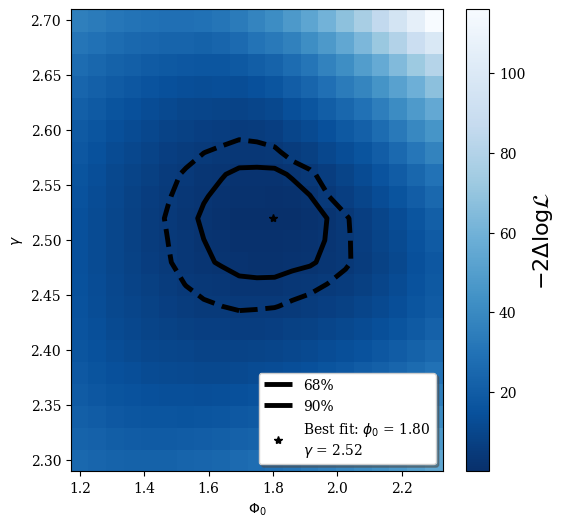

In [27]:
# 2d

# heatmap ll and contour
levels = [2.27, 4.60]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "90%"]

linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

name = "SPL_2D" # 
best_fit = scan_dict[name].get_freefit(drop_unsuccessful="True")

colors = ["black"] # black red


cntr = ax.contour( x[name], y[name], dllh[name], 
                levels=levels, colors=colors, linewidths=3.5, linestyles = linestyles )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')

# best fit
norm = best_fit['astro_norm']
gamma = best_fit['gamma_astro']

dot, = ax.plot([norm], [gamma], "*", color=colors[0])

# set the legend
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm:.2f}\n" + r"$\gamma$ = " + f"{gamma:.2f}")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right",
                ncols=1,frameon=True,fancybox=True,shadow=True)

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/best_fit/llscan_contour_bestfit_{name}.pdf")

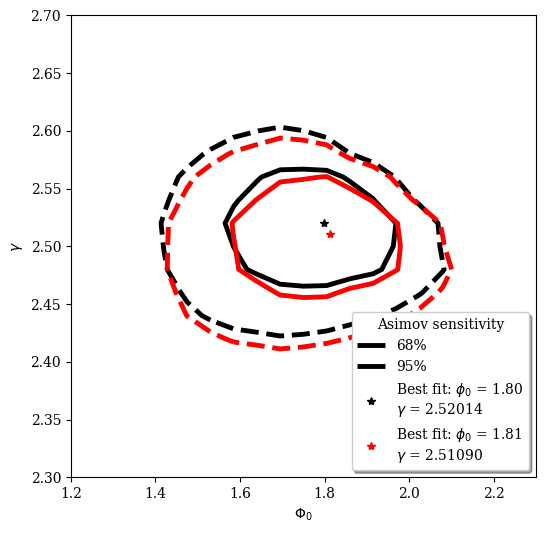

In [14]:
name1 = "SPL_2D"
name2 = "SPL_he_2D"

# name1 = "SPL_2D"
# name2 = "SPL_emptyICC_2D"

# name1 = "SPL_he_2D"
# name2 = "SPL_he_emptyICC_2D"


best_fit1 = scan_dict[name1].get_freefit(drop_unsuccessful="True")
norm1 = best_fit1['astro_norm']
gamma1 = best_fit1['gamma_astro']

best_fit2 = scan_dict[name2].get_freefit(drop_unsuccessful="True")
norm2 = best_fit2['astro_norm']
gamma2 = best_fit2['gamma_astro']

levels = [2.3,5.99]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "95%"]

colors = ["black", "red", "black", "red"]
labels = ["Without HE", "With HE"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

cntr1 = ax.contour( x[name1], y[name1], dllh[name1], 
                levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

cntr2 = ax.contour( x[name2], y[name2], dllh[name2], 
                levels=levels, colors=colors[1], linewidths=3.5, linestyles = linestyles )

# best fit
dot1, = ax.plot([norm1], [gamma1], "*", color=colors[0])

# best fit
dot2, = ax.plot([norm2], [gamma2], "*", color=colors[1])


# set the legend
h, _ = cntr1.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot1)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm1:.2f}\n" + r"$\gamma$ = " + f"{gamma1:.5f}")

lh.append(dot2)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm2:.2f}\n" + r"$\gamma$ = " + f"{gamma2:.5f}")


ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/best_fit/compare_contour_bestfit_{name1}-{name2}.pdf")